In [1]:
# Решим задачу анализа рукописных цифр двумя способами:
# 1) C помощью GaussianNB
# 2) С помощью Сверточной Нейронной сети

# И сравним показатели точности распознавания!

# GaussianNB

In [2]:
# Загрузим данные из sklearn.datasets

import seaborn as sns
from sklearn.datasets import load_digits

In [3]:
digits = load_digits()
digits.images.shape # 1797 изображений размеров 8х8

(1797, 8, 8)

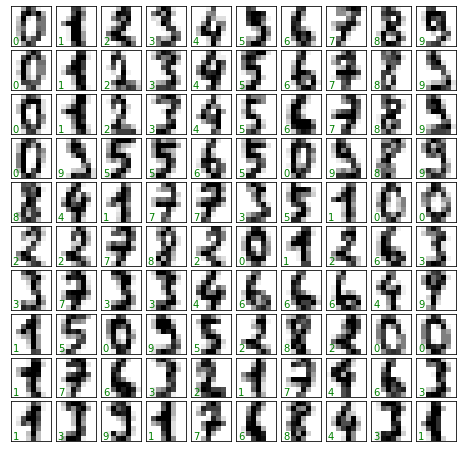

In [4]:
# Визуализируем изображения
import matplotlib.pyplot as plt
%matplotlib inline

# subplot_kw убирает масштаб
# gridspec_kw задает отступы рамок

fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks' : [], 'yticks' : []}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat): # flat для итерации
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

In [5]:
axes.flat # получаем итератор

In [6]:
# Для работы с этими данными в библиотеке Sklearn нам нужно получить их двумерное представление:
#     [n_samples, n_features].

# Для этого будем трактовать каждый каждый пиксел изображения как признак(feature), то есть сейчас нам нужно представить
# массивы пикселов 8x8 в вектор длиной 64. Помимо этого нужно получить целевой массив, задающий метку 

In [7]:
X = digits.data
X.shape

(1797, 64)

In [8]:
y = digits.target
y.shape

(1797,)

In [9]:
# Итого получаем 1797 выборок  и 64 признака, то есть теперь наше предтавление [1797, 64]

### Понижаем размерность

In [10]:
# Сейчас у нас 64 признака, визуализировать их непросто в 64-мерном пространстве. Понизим количество измерений
# до 2-х с помощью метода Isomap

from sklearn.manifold import Isomap

iso = Isomap(n_components=2)
iso.fit(digits.data)

data_projected = iso.transform(digits.data)
data_projected.shape

/home/alex/jupyter/environment/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/alex/jupyter/environment/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

In [11]:
data_projected[:, 1]

array([ 28.06891135,  48.29792057,  21.60527119, ..., -24.93724342,
       -71.60775029, -36.8662784 ])

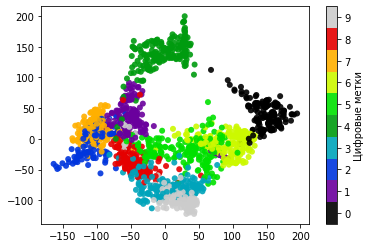

In [12]:
# Теперь наши данные стали двумерными! Построим график данных, чтобы увидеть можно ли 
# что-то понять из их структуры

plt.scatter(data_projected[:, 0], data_projected[:, 1], c = digits.target, edgecolor='none', alpha=0.9,
           cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='Цифровые метки', ticks=range(10))
plt.clim(-0.5, 9.5)

In [13]:
# Этот график дает нам представление в о разделении различных цифр в 64-х мерном пространстве.
#  В целом различные группы достаточно хорошо разнесены в параметрическом пространстве, а это значит
# что даже довольно простой алгоритм классификации с учителем должен отработать хорошо.

### Алгоритм классификации

In [14]:
# Примени алгоритм классификации к нашим цифрам. Разобьем нашу выборку на тренировочную и контрольную,
# после чего обучим тестовую выборку на Гауссовской наивной баесовской модели

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [16]:
X_train.shape

(1437, 64)

In [17]:
# Импортируем класс

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [18]:
y_model = model.predict(X_test)

In [19]:
y_model


array([0, 7, 0, 8, 9, 8, 3, 7, 8, 8, 5, 3, 2, 2, 8, 4, 8, 5, 5, 8, 8, 2,
       7, 5, 8, 3, 3, 5, 8, 3, 5, 2, 7, 7, 5, 0, 7, 9, 1, 4, 3, 5, 1, 5,
       7, 9, 9, 7, 3, 1, 7, 8, 8, 7, 9, 6, 8, 8, 8, 0, 1, 4, 0, 5, 1, 1,
       0, 1, 0, 8, 3, 7, 4, 6, 6, 4, 7, 7, 5, 0, 4, 8, 5, 5, 2, 8, 7, 5,
       8, 7, 2, 7, 5, 1, 0, 9, 7, 9, 1, 3, 6, 5, 5, 0, 8, 7, 9, 8, 3, 1,
       6, 5, 2, 4, 8, 8, 6, 7, 3, 4, 3, 6, 6, 8, 1, 0, 3, 9, 2, 6, 5, 3,
       0, 2, 9, 7, 8, 8, 7, 5, 6, 9, 5, 0, 8, 0, 9, 1, 3, 3, 0, 8, 2, 0,
       7, 0, 6, 1, 8, 4, 4, 1, 0, 6, 3, 1, 1, 8, 5, 3, 7, 6, 3, 9, 5, 9,
       8, 8, 1, 9, 2, 9, 5, 2, 0, 0, 8, 3, 4, 3, 5, 9, 4, 0, 0, 7, 6, 6,
       7, 8, 3, 6, 3, 6, 8, 8, 1, 6, 5, 5, 6, 0, 2, 9, 9, 8, 1, 5, 5, 3,
       7, 8, 8, 4, 8, 0, 3, 4, 2, 1, 3, 6, 6, 8, 2, 1, 7, 9, 4, 7, 3, 8,
       0, 7, 0, 5, 4, 5, 4, 1, 1, 3, 1, 7, 8, 3, 7, 5, 8, 6, 2, 8, 2, 3,
       6, 8, 2, 7, 0, 6, 8, 7, 5, 5, 8, 6, 3, 2, 4, 0, 4, 6, 9, 7, 0, 7,
       7, 9, 5, 7, 9, 8, 9, 3, 1, 6, 6, 0, 1, 4, 0,

In [20]:
# Оценим точность модели

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.8416666666666667

In [21]:
# Даже при такой простой модели мы получили точность 83%.
# Визуализируем с помощью МАТРИЦЫ РАЗЛИЧИЙ(confusion matrix) где наша модель ошиблась

Text(91.68, 0.5, 'Настоящее значение')

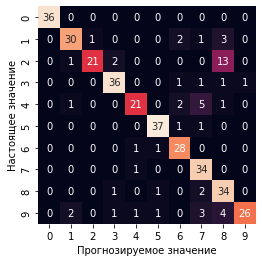

In [24]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('Прогнозируемое значение')
plt.ylabel('Настоящее значение')

In [25]:
# Данная горячая карта показывает места, где наша модель склонна ошибаться.

# Сверточная нейронная сеть

In [26]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.datasets import load_digits

In [27]:
digits = load_digits()

In [28]:
digits.target.shape # Выборка из 1797 элементов

(1797,)

In [29]:
digits.images.shape

(1797, 8, 8)

In [30]:
y = digits.target
X_image = digits.images

In [31]:
# Разделим выборку на тренировочную и тестовую

X_train, X_test, y_train, y_test = train_test_split(X_image, y, train_size=0.8)

In [32]:
X_train.shape

(1437, 8, 8)

In [33]:
X_train[0]

array([[ 0.,  0.,  8., 14., 16., 16.,  1.,  0.],
       [ 0.,  6., 16., 16.,  8.,  3.,  0.,  0.],
       [ 0., 14., 14.,  1.,  0.,  0.,  0.,  0.],
       [ 0., 10., 15.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  3., 15., 16.,  6.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  8., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  2., 13., 15.,  0.,  0.,  0.],
       [ 0.,  0., 10., 16.,  4.,  0.,  0.,  0.]])

In [34]:
# Переведем данные в тензоры

X_test = torch.FloatTensor(X_test)
X_train = torch.FloatTensor(X_train)
y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

tensor(5)


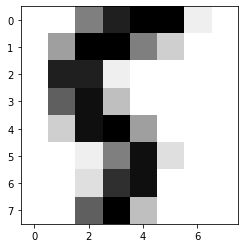

In [35]:
# Визуализируем цифру

import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='binary')
print(y_train[0])

In [36]:
X_train.shape

torch.Size([1437, 8, 8])

In [37]:
# изменим размерность входных данных, добавив еще одно измерение
# поскольку Conv2D хочет получать на вход не просто 2D изображений,
# а матриц с несколькими каналами глубины, и не важно, если канал всего 1

# для этого предусмотрим еще однон единичное измерение

X_test = X_test.unsqueeze(1).float()
X_train = X_train.unsqueeze(1).float()

In [38]:
X_train.shape

torch.Size([1437, 1, 8, 8])

### Опишем модель

In [39]:
class ImNet(torch.nn.Module):
    def __init__(self):
        super(ImNet, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(in_channels=1, 
                                out_channels=4, kernel_size=3)
        self.act1 = torch.nn.ReLU()
        
        self.conv2 = torch.nn.Conv2d(in_channels=4, out_channels=10, 
                                    kernel_size=4)
        self.act2 = torch.nn.ReLU()
        
        self.fc1 = torch.nn.Linear(3*3*10, 150)
        self.act3 = torch.nn.ReLU()
        
        self.fc2 = torch.nn.Linear(150, 40)
        self.act4 = torch.nn.ReLU()
        
        self.fc3 = torch.nn.Linear(40, 10)
        
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.conv2(x)
        x = self.act2(x)
        
        # растянем наш 4-х мерный тензор (1 размерность это размер батча)
        # view преобразует тензор к нужной размерности
        
        x = x.view(x.size(0),  x.size(1)*x.size(2)*x.size(3))
        
        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
im_net = ImNet()

# зачем каждый раз используем в свертках функции активации? ==>

# Суть в том, что композиция линейных преобразований линейна 
# и без функций активации вся эта многослойность схлопнется 
# и сведется к простому перемножению двух матриц. Именно добавление
# промежуточной нелинейности позволяет разнообразить поведение модели.
        

In [40]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(im_net.parameters(), lr=1.0e-3)

In [41]:
im_net.parameters

<bound method Module.parameters of ImNet(
  (conv1): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
  (act1): ReLU()
  (conv2): Conv2d(4, 10, kernel_size=(4, 4), stride=(1, 1))
  (act2): ReLU()
  (fc1): Linear(in_features=90, out_features=150, bias=True)
  (act3): ReLU()
  (fc2): Linear(in_features=150, out_features=40, bias=True)
  (act4): ReLU()
  (fc3): Linear(in_features=40, out_features=10, bias=True)
)>

In [42]:
X_train.shape


torch.Size([1437, 1, 8, 8])

In [43]:
# обучим модель
batch_size = 100

test_accuracy_history = []
test_loss_history = []

for epoch in range(1000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        im_net.train()
        
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = im_net.forward(X_batch)
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
    im_net.eval()
    test_preds = im_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data)
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

tensor(0.4194)
tensor(0.7000)
tensor(0.8111)
tensor(0.8528)
tensor(0.8917)
tensor(0.9056)
tensor(0.9361)
tensor(0.9389)
tensor(0.9417)
tensor(0.9611)
tensor(0.9444)
tensor(0.9417)
tensor(0.9583)
tensor(0.9583)
tensor(0.9472)
tensor(0.9583)
tensor(0.9556)
tensor(0.9583)
tensor(0.9528)
tensor(0.9722)
tensor(0.9667)
tensor(0.9611)
tensor(0.9611)
tensor(0.9611)
tensor(0.9667)
tensor(0.9667)
tensor(0.9639)
tensor(0.9639)
tensor(0.9667)
tensor(0.9694)
tensor(0.9722)
tensor(0.9694)
tensor(0.9694)
tensor(0.9694)
tensor(0.9694)
tensor(0.9694)
tensor(0.9667)
tensor(0.9750)
tensor(0.9750)
tensor(0.9694)
tensor(0.9694)
tensor(0.9694)
tensor(0.9667)
tensor(0.9694)
tensor(0.9694)
tensor(0.9694)
tensor(0.9694)
tensor(0.9694)
tensor(0.9722)
tensor(0.9722)
tensor(0.9722)
tensor(0.9694)
tensor(0.9750)
tensor(0.9694)
tensor(0.9694)
tensor(0.9722)
tensor(0.9694)
tensor(0.9722)
tensor(0.9694)
tensor(0.9722)
tensor(0.9694)
tensor(0.9722)
tensor(0.9722)
tensor(0.9694)
tensor(0.9722)
tensor(0.9750)
tensor(0.9

KeyboardInterrupt: 

In [172]:
# Точность 98% 

In [44]:
test_preds

tensor([[ 20.3543,  -6.8829,  -4.2641,  ...,  -3.1547,  -8.5015, -10.1709],
        [-16.0487,  -4.6219, -10.5779,  ..., -11.1769,  16.2061,  -1.3611],
        [-13.1868, -10.7086, -27.7090,  ...,  -5.8886,  -2.1808,  22.6835],
        ...,
        [ -8.7664, -11.3438, -35.3721,  ...,  -0.3795, -11.2013,  -2.7502],
        [ -0.0509,  -1.8583, -14.5067,  ..., -15.0628,   3.9650, -26.0831],
        [ -7.2433,  -9.4946, -30.6324,  ...,  -2.9697, -10.5737,  20.6292]],
       grad_fn=<AddmmBackward0>)

In [47]:
y_test

tensor([0, 8, 9, 2, 5, 9, 1, 7, 3, 1, 4, 7, 7, 7, 9, 2, 1, 8, 4, 4, 8, 6, 2, 2,
        9, 7, 3, 1, 7, 4, 3, 3, 4, 1, 3, 7, 6, 9, 2, 9, 6, 6, 1, 8, 9, 3, 7, 8,
        1, 7, 5, 8, 7, 9, 5, 3, 8, 0, 3, 4, 2, 1, 9, 7, 6, 2, 0, 5, 8, 1, 1, 1,
        6, 8, 0, 1, 1, 6, 7, 1, 3, 2, 6, 9, 1, 2, 5, 8, 4, 3, 6, 6, 4, 6, 2, 5,
        6, 7, 8, 9, 7, 2, 3, 5, 4, 1, 7, 4, 3, 7, 1, 0, 2, 5, 2, 3, 1, 3, 6, 1,
        8, 2, 3, 7, 7, 5, 7, 1, 5, 1, 8, 9, 3, 3, 5, 9, 8, 4, 1, 7, 0, 2, 1, 9,
        6, 2, 2, 3, 0, 2, 2, 0, 9, 9, 8, 8, 9, 7, 7, 3, 2, 3, 3, 0, 7, 6, 1, 3,
        7, 4, 5, 1, 6, 0, 2, 2, 9, 6, 4, 7, 2, 2, 3, 9, 2, 5, 9, 8, 1, 5, 5, 1,
        6, 8, 8, 5, 4, 3, 8, 9, 5, 1, 3, 1, 9, 3, 8, 8, 4, 3, 6, 3, 3, 1, 3, 9,
        1, 1, 7, 6, 7, 6, 4, 4, 2, 3, 1, 2, 9, 4, 8, 9, 2, 4, 0, 3, 9, 3, 2, 1,
        1, 9, 4, 4, 6, 2, 2, 3, 0, 2, 1, 8, 3, 6, 6, 7, 9, 7, 2, 8, 4, 0, 7, 2,
        2, 5, 4, 7, 6, 3, 1, 6, 5, 3, 4, 8, 6, 1, 3, 8, 0, 0, 3, 5, 6, 8, 2, 4,
        5, 8, 8, 0, 4, 0, 9, 8, 7, 1, 0,

In [48]:
preds

tensor([[-8.3832e+00, -1.5966e+00, -1.6327e+01, -1.2279e+01, -6.9723e+00,
          6.9369e+00, -8.3325e+00, -4.5908e+00,  1.5467e+00, -7.0153e-01],
        [-1.5839e+01, -4.4513e+00,  4.8339e-01,  1.4330e+01, -1.7077e+01,
         -8.3763e+00, -1.0901e+01, -3.9607e+00,  4.0107e+00, -6.8345e+00],
        [-3.3935e-01, -5.6831e+00, -2.2660e+01, -3.9786e+01,  2.6748e+01,
         -1.0035e+01,  4.6514e+00,  5.1315e+00, -1.5091e+01, -2.3971e+01],
        [-1.8356e+01, -1.6626e+00, -1.5724e+01, -3.8490e+00, -8.4279e+00,
          9.0503e+00, -1.1941e+01,  1.2816e+00,  3.5010e-01,  1.8962e+00],
        [-1.4821e+01,  2.9716e-01, -1.8088e+00, -1.2299e+01, -2.2378e+00,
         -1.3593e+01, -5.4360e+00,  5.0405e-02,  6.1044e+00, -8.2585e+00],
        [ 2.7140e+01, -9.0289e+00, -1.0023e+01, -2.0653e+01, -6.7467e+00,
          3.0133e+00, -5.2481e-01, -5.9642e+00, -9.5645e+00, -1.1857e+01],
        [-2.6617e+01,  1.4517e+01, -6.4734e+00, -4.0591e+00, -2.1997e+00,
         -1.3295e+01, -2.0022e+0

In [50]:
y_batch

tensor([8, 4, 0, 7, 2, 8, 0, 2, 2, 6, 0, 3, 4, 4, 8, 5, 2, 1, 1, 9, 2, 1, 4, 6,
        9, 5, 6, 8, 4, 4, 5, 8, 9, 0, 1, 8, 8, 6, 5, 9, 8, 9, 9, 5, 0, 0, 7, 2,
        7, 6, 2, 3, 1, 6, 3, 1, 5, 0, 7, 3, 6, 7, 5, 4, 5, 2, 4, 4, 6, 5, 9, 4,
        6, 2, 5, 0, 2, 8, 8, 9, 6, 4, 4, 8, 0, 1, 4, 7, 8, 2, 8, 2, 8, 9, 0, 9,
        5, 2, 5, 9])